# Renewable Power Generation Analysis: Solar vs Wind

This notebook analyzes renewable power generation data to classify energy sources between solar and wind based on weather conditions. We'll build a machine learning model to predict the optimal energy source based on various weather parameters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Data Preparation and Libraries

We'll import essential libraries for data analysis, machine learning, and visualization:
- pandas & numpy: For data manipulation
- scikit-learn: For machine learning algorithms and preprocessing
- joblib: For model persistence

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Renewable.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "pythonafroz/renewable-power-generation-and-weather-conditions",
  file_path,
)

print("First 5 records:", df.head())

First 5 records:                   Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0 

In [3]:
# Compute automatic thresholds from data distribution
ghi_threshold = df['GHI'].median()          # mid value of solar irradiance
wind_threshold = df['wind_speed'].median()  # mid value of wind speed

print(f"GHI threshold: {ghi_threshold:.2f} W/m²")
print(f"Wind Speed threshold: {wind_threshold:.2f} m/s")

GHI threshold: 1.60 W/m²
Wind Speed threshold: 3.70 m/s


# Setting Classification Thresholds

We determine thresholds for classifying energy sources:
- GHI (Global Horizontal Irradiance): Measures solar radiation
- Wind Speed: Measures wind power potential

These thresholds will help us label data points as either solar or wind energy optimal conditions.

In [4]:
df['label'] = np.where(
    (df['GHI'] >= ghi_threshold) & (df['GHI'] > df['wind_speed'] * 100),  # strong solar
    1,   # Solar
    0    # Wind
)

In [5]:
features = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
            'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
            'sunlightTime', 'dayLength', 'SunlightTime/daylength',
            'weather_type', 'hour', 'month']

X = df[features].copy()
y = df['label']

# Handle categorical and missing values
X['weather_type'] = X['weather_type'].astype('category').cat.codes
X = X.fillna(0)

In [6]:
# Scale and train
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8127096249618864


# Model Training and Evaluation

We use a Gaussian Naive Bayes classifier with the following steps:
1. Scale features using StandardScaler
2. Split data into training (80%) and testing (20%) sets
3. Train the model and evaluate its accuracy

This model will predict whether solar or wind power generation is more suitable based on weather conditions.

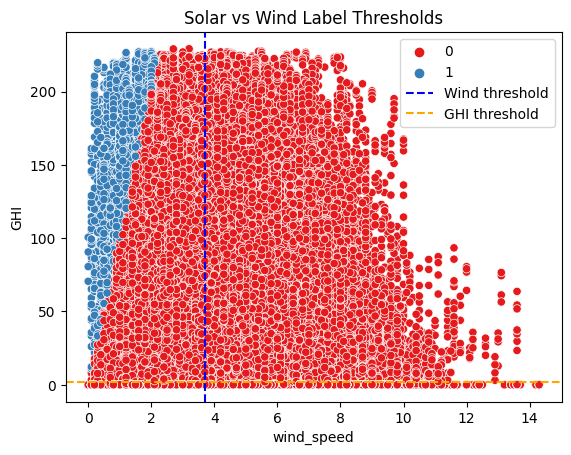

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='wind_speed', y='GHI', hue='label', palette='Set1')
plt.axvline(wind_threshold, color='blue', linestyle='--', label='Wind threshold')
plt.axhline(ghi_threshold, color='orange', linestyle='--', label='GHI threshold')
plt.legend()
plt.title("Solar vs Wind Label Thresholds")
plt.show()

# Visualizations

Two key visualizations are provided:
1. Scatter plot: Shows the relationship between wind speed and solar radiation (GHI), with classification thresholds
2. Confusion Matrix: Displays the model's prediction performance for both wind and solar conditions

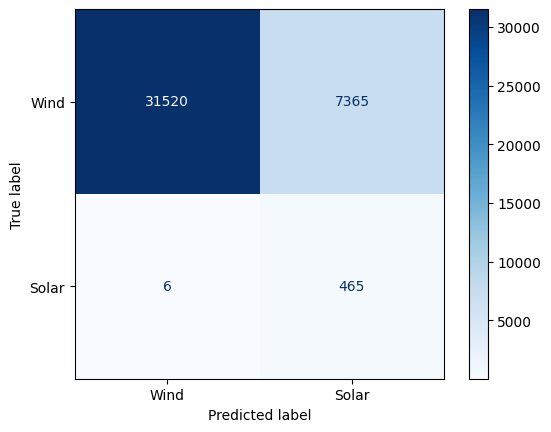

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Wind', 'Solar'])
disp.plot(cmap='Blues')
plt.show()